<a href="https://colab.research.google.com/github/KacioSilva/ProjetoTEIA/blob/main/Projeto_TEIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto TEIA 1° Unidade

Equipe: Kácio Silva, Tyago Ferreira, Luciano Bruno, Eduardo José da Silva e Adonai Ermínio.

#Importando a base de dados e o Pandas

In [64]:
import pandas as pd
import numpy as np

In [65]:
!pip install numpy

In [66]:
url = 'https://raw.githubusercontent.com/KacioSilva/ProjetoTEIA/refs/heads/main/weather_classification_data.csv?token=GHSAT0AAAAAACZ4POGU3KENLCUL2SZRBGUWZZKV6WA'

df = pd.read_csv(url)

#Analisando dos Dados

In [54]:
pip install -U ydata-profiling

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


In [55]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Considerações sobre os dados:

As primeiras informações observadas com o Pandas Proffiling:

1. **Não** possuímos dados ausentes e nem dados duplicados;

2. Possuímos **13.200 dados**, o que é relativamente bom para a resolução do problema que temos.

3. Possuímos 11 variáveis, das quais **7 são numéricas** e **4 são categóricas**.

4. É notável a **presença de outliers** em colunas como Wind Speed, Atmospheric Pressure etc.

**PONDERAÇÕES SOBRE A MATRIZ DE CORRELAÇÃO:**

* No geral, as colunas em si possuem uma relação boa com as demais: tanto para o lado positivo, quanto para o lado negativo. Na ocasião, percebe-se que a **localização** e **temporada** são atributos que não possuem tanta conexão com os outros atribuitos. Portanto, mais a posterior, para melhorar os índices, pode ser viável remover essas colunas e testar.  




###Coluna Temperatura


*   Percebe-se que se trata de valores numéricos. Nesse caso, se baseando no pandas proffiling, percebemos que temos dados do tipo float. Em relação a quantidade de dados distintos, são poucos comparado com a quantidade total dos dados: representa apenas 1%;

* Além disso, é notável que existem, de certa forma, outliers (temperaturas muito altas se distoando do restante e da média). Portanto, seria necessário tratá-los, possivelmente, agrupando em faixas de temperaturas ou até mesmo removendo-os da base de dados;

### Coluna Umidade

*   Percebe-se que, além de vermos que são dados numéricos, nesse caso, se baseando no pandas proffiling, percebemos que temos dados do tipo inteiro;

* No pandas profiling, observa-se também que possuímos 90 valores distintos, o que não precisaria de uma intervenção para ser utilizado pois representa apenas 0,7% do conjunto total de dados;

* Também percebemos que o histograma segue, de certa forma, uma normal. Utilizando também um código para fazer a análise de outliers, percebemos que não possuímos, nesse caso, outliers.

* Média: 68.71%, sugerindo que a maioria dos locais têm uma umidade relativa alta;

* Desvio Padrão: 20.19, indicando uma variação significativa na umidade.

###Coluna Velocidade do Vento

*   Percebe-se que, além de vermos que são dados numéricos, nesse caso, utilizando um histograma para observar a distribuição e também se baseando no pandas proffiling, percebemos que temos dados do tipo float;

* No pandas profiling, observa-se também que possuímos 97 valores distintos, o que não precisaria de uma intervenção para ser utilizado mais a frente pois representa apenas 0,7% do conjunto total de dados;

* Além disso, é notável que existem, de certa forma, outliers (velocidades mais altas não possuem uma frequência alta). Portanto, seria necessário tratá-los, possivelmente, agrupando em faixas de velocidade ou até mesmo removendo-os da base de dados;

* Média: 9.83 km/h, com velocidades variando de 0 a 48.5 km/h;

* Desvio Padrão: 6.91, mostrando uma variação considerável na velocidade do vento.

###Coluna Precipitação


*   Percebe-se que, além de vermos que são dados numéricos, nesse caso, utilizando um histograma para observar a distribuição e também se baseando no pandas proffiling, percebemos que temos dados do tipo float;

* No pandas profiling, observa-se também que possuímos 110 valores distintos, o que não precisaria de uma intervenção para ser utilizado mais a frente pois representa apenas 0,8% do conjunto total de dados;

* Em relação a visualização do histograma, percebe-se que a distribuição da precipitação está, de certa forma, equilibrada. Certamente, há valores que são mais altos ou mais baixos, mas não é considerado outliers.

* Média: 53.64%, indicando que a precipitação média é moderada;

* Desvio Padrão: 31.95, sugerindo uma variação significativa na precipitação.

###Coluna Cobertura de Nuvem

*   Percebemos que possuímos dados categóricos do tipo object, o que precisa de uma intervenção mais a frente.

* A distribuição dos dados não é tão uniforme, principalmente quando é comparado o tipo cloudy com as demais;

*  Por mais que a categoria ''cloudy'' seja a minoria, a informação deve ser útil para ser utilizado pelo algoritmo a posterior;

* Possuímos 4 valores para classificar a cobertura da núvem.

### Coluna Pressão Atmosférica

*   Percebe-se que, além de vermos que são dados numéricos, nesse caso, se baseando no pandas proffiling, percebemos que temos dados do tipo float;

* No pandas profiling, quanto aos valores de dados distintos, é mais preocupante. Essa coluna apresenta mais de 40% dos dados distintos, o que pode gerar um problema de aprendizado para os modelos. Dessa forma, há algumas possíveis soluções para o tratamento da coluna: Não utilizar no modelo ou tratar de forma a identificar um valor por faixas;

* Em relação a visualização do histograma, percebe-se que a maior parte da distribuição da pressão atmosférica está na região central, existindo outliers com menores e maiores pressões atmosféricas, necessitando também de uma intervenção;

* Média: 1005.83 hPa, com uma faixa de 800.12 a 1199.21 hPa;

* Desvio Padrão: 37.20, indicando uma variação considerável na pressão atmosférica.

###Coluna índice UV

*   Percebe-se que são dados numéricos do tipo inteiro;

* No pandas profiling, quanto aos valores de dados distintos, temos um valor que é muito baixo, o que representa 0,1% dos nossos dados. Dessa forma, não precisa de tratamento nesse aspecto;

* Em relação a visualização do histograma, percebe-se que há uma distribuição uniforme com exceção dos índices UV's mais baixos. Percebemos a presença de outliers que acreditamos que não seja um problema para os modelos;

* Média: 4.01, com valores variando de 0 a 14;

* Desvio Padrão: 3.86, sugerindo uma variação significativa no índice UV.

###Coluna Temporada

*   Percebe-se que, além de vermos que são dados classificatórios, são dados do tipo object, o que precisaria de uma intervenção para ser utilizado mais a frente.

*    Através do gráfico, percebe-se que há uma distribuição uniforme dos dados. Já pensando mais a frente, não seria necessário fazer um balanceamento de classe desses dados;

*  Por mais que a classificação do tipo Winter possua a maior parte dos dados em relação aos outros tipos, podemos considerar que não há presença de outliers;

* Possuímos 4 valores para classificar a temporada.

###Coluna Visibilidade (km)

*   Percebe-se que, além de vermos que são dados numéricos, são do tipo float;

* No pandas profiling, quanto aos valores de dados distintos, temos um valor que é muito baixo, o que representa 0,3% dos nossos dados. Dessa forma, não precisa de tratamento nesse aspecto;

* Em relação a visualização do histograma, percebe-se que a maior parte da distribuição dos dados está em uma localidade, enquanto a minoria representa os valores de visibilidade mais alto. Dessa forma, os valores mais altos representam outliers. Portanto, seria necessário tratá-los classificando por tipos de visibilidade (baixa, média e alta, por exemplo)

* Média: 5.46 km, com visibilidade variando de 0 a 20 km;

* Desvio Padrão: 3.37, indicando uma variação considerável na visibilidade.

###Coluna Localização

*   Percebe-se que, além de vermos que são dados classificatórios, são dados do tipo object, o que precisaria de uma intervenção para ser utilizado mais a frente.

*    Através do gráfico, percebe-se que há uma distribuição equilibrada dos dados;

*  Não é notada a presença de outliers;

* Possuímos 3 valores para classificar a localidade.

###Coluna Tipo de Chuva

*   Percebe-se que, além de vermos que são dados classificatórios, são dados do tipo object, o que precisaria de uma intervenção para ser utilizado mais a frente.

*    Através do gráfico, percebe-se que há uma distribuição uniforme dos dados. Já pensando mais a frente, não seria necessário fazer um balanceamento de classe desses dados;

*  Não há presença de outliers;

* Possuímos 4 valores para classificar a chuva.

#Tratando os Dados

##Coluna Temperatura

A princío, como possuímos temperaturas muito variadas (desde temperatura muito baixas até temperaturas muito altas, decidimos classificá-las por grupos). Além disso, foi necessário classificá-los com valores numéricos e não do tipo object.

In [67]:
bins = [-26, 0, 10, 20, 30, 40, float('inf')]

numeric_labels = [0, 1, 2, 3, 4, 5]
text_labels = ['Muito Baixa', 'Baixa', 'Moderada', 'Alta', 'Muito Alta', 'Extremamente Alta']

# Criando uma nova coluna 'Temperature Category' com as categorias definidas
df['Temperature Category'] = pd.cut(df['Temperature'], bins=bins, labels=numeric_labels)

df['Temperature Category'].head(15)

0     2
1     4
2     3
3     4
4     3
5     4
6     0
7     1
8     1
9     3
10    4
11    4
12    2
13    0
14    3
Name: Temperature Category, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

Visualizando a nova categoria:

##Coluna Velocidade do Vento

Nesse caso, utilizamos a mesma solução para remover outliers das outras colunas. Fizemos um agrupamento e classificamos por categorias. A princípio, é necessário testar mais a posterior e verificar se a estratégia foi válida ou não.

In [68]:
wind_bins = [-1, 5, 10, 20, 45, float('inf')]

wind_numeric_labels = [0, 1, 2, 3, 4]
wind_text_labels = ['Muito Baixa', 'Baixa', 'Moderada', 'Alta', 'Muito Alta']

# Criando uma nova coluna 'Temperature Category' com as categorias definidas
df['Wind Speed Category'] = pd.cut(df['Wind Speed'], bins=wind_bins, labels=wind_numeric_labels)

df['Wind Speed Category'].head(15)

0     1
1     1
2     1
3     0
4     2
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    2
13    2
14    0
Name: Wind Speed Category, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

##Coluna Precipitação

Muitos algoritmos de classificação são sensíveis a escalas de características. Nesse caso, como possuímos uma distribuição de dados até que uniforme, decidimos utilizar o MinMaxScaler para normalizar os dados e melhorar o desempenho do algoritmo.

In [69]:
from sklearn.preprocessing import MinMaxScaler

df['Precipitation (%)'] = MinMaxScaler().fit_transform(df[['Precipitation (%)']])

Visualizando os dados normalizados

In [70]:
print(df['Precipitation (%)'])

0        0.752294
1        0.651376
2        0.146789
3        0.752294
4        0.605505
           ...   
13195    0.651376
13196    0.211009
13197    0.256881
13198    0.862385
13199    0.844037
Name: Precipitation (%), Length: 13200, dtype: float64


##Coluna Cobertura de Nuvem

Nesse caso, utilizamos o LabelEncoder para transformar os dados categóricos para o tipo numérico, mantendo o padrão de classificação. Isso foi feito para que possamos utilizar essa coluna no modelo mais a posterior.

In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Ajustar o encoder com a coluna 'Cloud Cover' e transformar os valores
df['Cloud Cover'] = encoder.fit_transform(df['Cloud Cover'])

In [72]:
print(df['Cloud Cover'])

0        3
1        3
2        0
3        0
4        2
        ..
13195    2
13196    1
13197    2
13198    2
13199    2
Name: Cloud Cover, Length: 13200, dtype: int64


##Coluna Localização

Nesse caso, utilizamos o LabelEncoder para transformar os dados categóricos para o tipo numérico, mantendo o padrão de classificação. Isso foi feito para que possamos utilizar essa coluna no modelo mais a posterior.

In [73]:
encoder = LabelEncoder()

# Ajustar o encoder com a coluna 'Cloud Cover' e transformar os valores
df['Location'] = encoder.fit_transform(df['Location'])

In [74]:
print(df['Location'])

0        1
1        1
2        2
3        0
4        2
        ..
13195    2
13196    0
13197    0
13198    1
13199    2
Name: Location, Length: 13200, dtype: int64


##Coluna Tipo de Chuva

Nesse caso, utilizamos o LabelEncoder para transformar os dados categóricos para o tipo numérico, mantendo o padrão de classificação. Isso foi feito para que possamos utilizar essa coluna no modelo mais a posterior.'

In [75]:
encoder = LabelEncoder()

# Ajustar o encoder com a coluna 'Cloud Cover' e transformar os valores
df['Weather Type'] = encoder.fit_transform(df['Weather Type'])

In [76]:
print(df['Weather Type'])

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int64


##Coluna Temporada

Nesse caso, utilizamos o LabelEncoder para transformar os dados categóricos para o tipo numérico, mantendo o padrão de classificação. Isso foi feito para que possamos utilizar essa coluna no modelo mais a posterior.

In [77]:
encoder = LabelEncoder()

# Ajustar o encoder com a coluna 'Cloud Cover' e transformar os valores
df['Season'] = encoder.fit_transform(df['Season'])

In [78]:
print(df['Weather Type'])

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int64


##Coluna Umidade

Muitos algoritmos de classificação são sensíveis a escalas de características. Nesse caso, como possuímos uma distribuição de dados até que uniforme, decidimos utilizar o MinMaxScaler para normalizar os dados e melhorar o desempenho do algoritmo.

In [79]:
df['Humidity'] = MinMaxScaler().fit_transform(df[['Humidity']])

Visualizando os dados normalizados

In [80]:
print(df['Humidity'])

0        0.595506
1        0.853933
2        0.494382
3        0.707865
4        0.606742
           ...   
13195    0.606742
13196    0.629213
13197    0.640449
13198    0.629213
13199    0.202247
Name: Humidity, Length: 13200, dtype: float64


##Coluna Pressão Atmosférica

Para tratar os outliers dessa coluna, decidimos utilizar a técnica Capping. Antes do capping, a distribuição de outliers distorciam a análise. Após o capping, a distribuição parece mais normalizada, com menos influência de valores fora do intervalo usual, o que ajuda a focar nos dados mais representativos e evitar o impacto de outliers na análise.

    Atmospheric Pressure  Atmospheric Pressure Capped
0                1010.82                      1010.82
1                1011.43                      1011.43
2                1018.72                      1018.72
3                1026.25                      1026.25
4                 990.67                       990.67
5                1010.03                      1010.03
6                 990.87                       990.87
7                 984.46                       984.46
8                 999.44                       999.44
9                1012.13                      1012.13
10                879.88                       879.88
11               1029.16                      1029.16
12               1016.08                      1016.08
13                986.19                       986.19
14               1018.88                      1018.88


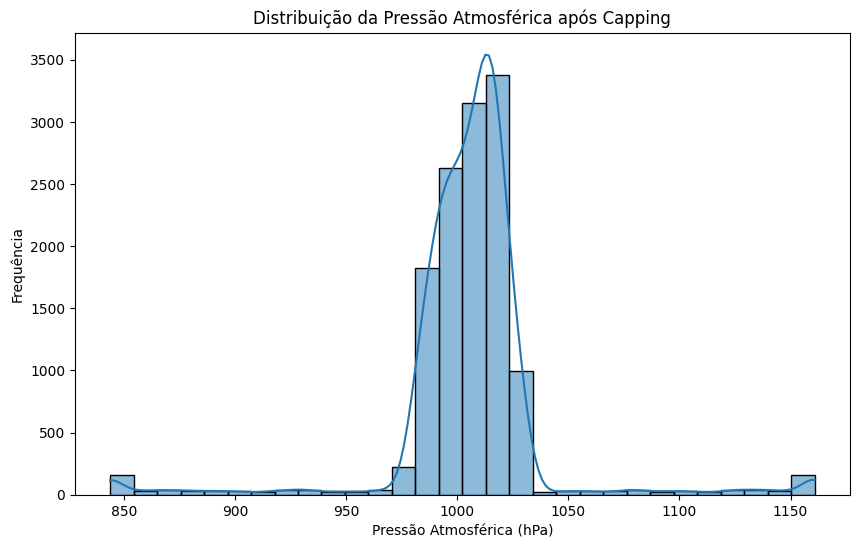

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir percentis para capping
lower_percentile = 1
upper_percentile = 99

# Calcular valores de capping
lower_cap = np.percentile(df['Atmospheric Pressure'].dropna(), lower_percentile)
upper_cap = np.percentile(df['Atmospheric Pressure'].dropna(), upper_percentile)

# Aplicar capping
df['Atmospheric Pressure' + ' Capped'] = df['Atmospheric Pressure'].apply(lambda x: lower_cap if x < lower_cap else (upper_cap if x > upper_cap else x))

# Verificar o resultado do capping
print(df[['Atmospheric Pressure', 'Atmospheric Pressure' + ' Capped']].head(15))

# Visualizar a distribuição após capping
plt.figure(figsize=(10, 6))
sns.histplot(df['Atmospheric Pressure' + ' Capped'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Pressão Atmosférica após Capping')
plt.xlabel('Pressão Atmosférica (hPa)')
plt.ylabel('Frequência')
plt.show()

Dropando a coluna de Pressão Atmosférica Sem estar normalizada

In [82]:
df = df.drop(['Atmospheric Pressure'], axis=1)

##Coluna Índice UV

Muitos algoritmos de classificação são sensíveis a escalas de características. Nesse caso, como possuímos uma distribuição de dados até que uniforme, decidimos utilizar o MinMaxScaler para normalizar os dados e melhorar o desempenho do algoritmo.

In [83]:
df['UV Index'] = MinMaxScaler().fit_transform(df[['UV Index']])
scaler = MinMaxScaler()

print(df['UV Index'])

0        0.142857
1        0.500000
2        0.357143
3        0.500000
4        0.071429
           ...   
13195    0.071429
13196    0.071429
13197    0.214286
13198    0.000000
13199    0.357143
Name: UV Index, Length: 13200, dtype: float64


##Coluna Visibilidade

Utilizamos, também, a técnica do Capping aqui. Mesmo utilizando essa técnica e removendo os outliers iniciais, outros outliers surgem devido a nova escala de valores. Portanto, é necessário testar o algoritmo e ver qual será a melhor solução.

    Visibility (km)  Visibility (km) Capped
0               3.5                     3.5
1              10.0                    10.0
2               5.5                     5.5
3               1.0                     1.0
4               2.5                     2.5
5               5.0                     5.0
6               4.0                     4.0
7               3.5                     3.5
8               1.0                     1.0
9               7.5                     7.5
10              1.0                     1.0
11              7.5                     7.5
12              5.5                     5.5
13              1.5                     1.5
14              5.5                     5.5


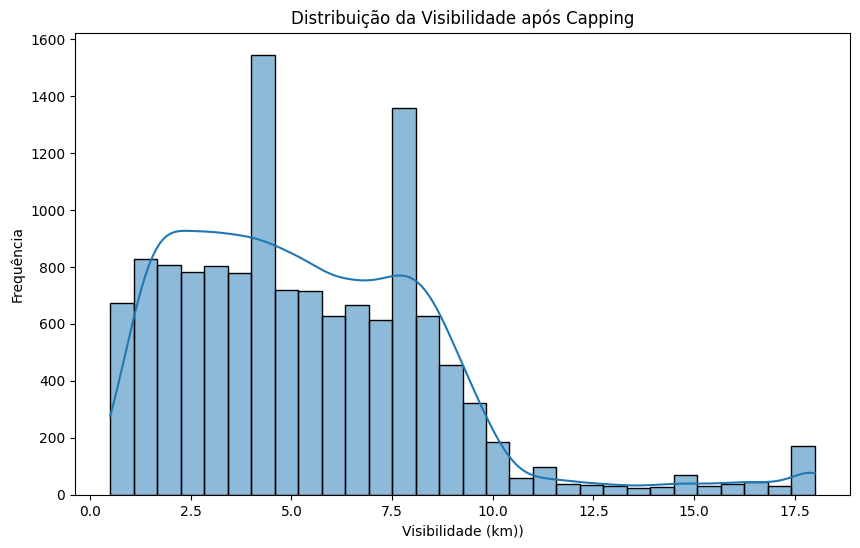

In [84]:
lower_percentile = 1
upper_percentile = 99

lower_cap = np.percentile(df['Visibility (km)'].dropna(), lower_percentile)
upper_cap = np.percentile(df['Visibility (km)'].dropna(), upper_percentile)

df['Visibility (km)' + ' Capped'] = df['Visibility (km)'].apply(lambda x: lower_cap if x < lower_cap else (upper_cap if x > upper_cap else x))

print(df[['Visibility (km)', 'Visibility (km)' + ' Capped']].head(15))

plt.figure(figsize=(10, 6))
sns.histplot(df['Visibility (km)' + ' Capped'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Visibilidade após Capping')
plt.xlabel('Visibilidade (km))')
plt.ylabel('Frequência')
plt.show()

Dropando a coluna sem estar normalizada

In [85]:
df = df.drop(['Visibility (km)'], axis=1)

#Realisando a Divisão dos Dados

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Criando as Arquiteturas Compostas

In [27]:
!pip3 install torch torchvision torchaudio

Convertendo os dados de entrada e saída para tensores

In [139]:
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

##Arquitetura 1

In [203]:
class RainTypeClassifier_V2(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(RainTypeClassifier_V2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])  # Primeira camada
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])  # Segunda camada
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])  # Terceira camada
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)  # Camada de saída
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [204]:
import torch.nn as nn
import torch.optim as optim

# Inicializar o modelo com os tamanhos de entrada, camadas ocultas e saída
model = RainTypeClassifier_V2(input_size=12, hidden_sizes=[64, 32, 16], output_size=4)

# Definir o critério de perda (para problemas de classificação com várias classes)
criterion = nn.CrossEntropyLoss()

# Definir o otimizador, usando o algoritmo Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from sklearn.metrics import accuracy_score
import torch

# Definir o número de épocas
n_epochs = 201  # Ajuste para o número de épocas desejado

# Criar DataLoader para dividir os dados em lotes (se ainda não tiver feito isso)
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Loop de treinamento
for epoch in range(n_epochs):
    loss_train = 0
    accuracy_train = 0
    loss_test = 0
    accuracy_test = 0

    model.train()  # Coloca o modelo em modo de treinamento

    # Loop sobre o DataLoader de treino
    for X, y in train_loader:
        optimizer.zero_grad()  # Zerar os gradientes do otimizador

        # Passar os dados de entrada pelo modelo
        y_pred = model(X)

        # Calcular a perda
        loss = criterion(y_pred, y)

        # Realizar backpropagation (cálculo do gradiente)
        loss.backward()

        # Atualizar os pesos com o otimizador
        optimizer.step()

        # Acumular a perda e a precisão para o conjunto de treino
        loss_train += loss.item()
        accuracy_train += (y_pred.argmax(dim=1) == y).sum().item() / len(y)

    # Avaliação do modelo no conjunto de teste
    model.eval()  # Coloca o modelo em modo de avaliação
    with torch.no_grad():  # Desliga o cálculo de gradientes
        for X_test, y_test in test_loader:
            y_pred_test = model(X_test)
            loss_test_batch = criterion(y_pred_test, y_test)

            # Acumular a perda e a precisão para o conjunto de teste
            loss_test += loss_test_batch.item()
            accuracy_test += (y_pred_test.argmax(dim=1) == y_test).sum().item() / len(y_test)

    # Calcular a média da perda e precisão por época
    loss_train /= len(train_loader)
    accuracy_train /= len(train_loader)
    loss_test /= len(test_loader)
    accuracy_test /= len(test_loader)

    # Imprimir a perda e precisão a cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}, "
              f"Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")

Epoch 10/201, Train Loss: 0.6091, Test Loss: 0.6347, Train Accuracy: 0.8065, Test Accuracy: 0.7634
Epoch 20/201, Train Loss: 0.4571, Test Loss: 0.4536, Train Accuracy: 0.8455, Test Accuracy: 0.8507
Epoch 30/201, Train Loss: 0.3921, Test Loss: 0.3925, Train Accuracy: 0.8722, Test Accuracy: 0.8646
Epoch 40/201, Train Loss: 0.3854, Test Loss: 0.4263, Train Accuracy: 0.8688, Test Accuracy: 0.8459
Epoch 50/201, Train Loss: 0.3726, Test Loss: 0.8381, Train Accuracy: 0.8728, Test Accuracy: 0.7102
Epoch 60/201, Train Loss: 0.3571, Test Loss: 0.3598, Train Accuracy: 0.8787, Test Accuracy: 0.8779
Epoch 70/201, Train Loss: 0.3480, Test Loss: 0.3662, Train Accuracy: 0.8813, Test Accuracy: 0.8651
Epoch 80/201, Train Loss: 0.3450, Test Loss: 0.3348, Train Accuracy: 0.8790, Test Accuracy: 0.8798


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

##Arquitetura 2

##Arquitetura 3

#Métricas

#Comparações de Métricas